# Lab 1
by Alexander Chkodrov\
October 9th, 2019

In this laboratory we set up git, Github, and warm up to using statistics in the form of continuous and discrete distributions with python.

In [17]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [54]:
print("from 0 to 1z: ", stats.norm.cdf(1, loc=0, scale=1) - stats.norm.cdf(0, loc=0, scale=1))
print("from -1z to 1z: ", stats.norm.cdf(1, loc=0, scale=1) - stats.norm.cdf(-1, loc=0, scale=1))
print("from -inf to 1z: ", stats.norm.cdf(1, loc=0, scale=1))

from 0 to 1z:  0.3413447460685429
from -1z to 1z:  0.6826894921370859
from -inf to 1z:  0.8413447460685429


Here I integrate the probability density function using the cdf command from scipy; the value 0.34 from the above line is the probability (out of 1) that a data point falls between 0 and 1 standard deviations on a normal distribution with mean 0 and standard deviation of 1. Note that I had to use two cdf commands as the cdf command integrates from the furthest left side of the distribution to the $\sigma$ value specified, so to get the cumulative probablity from mean to $\sigma$ instead you must first get the cumulative probability from the far left end of the distribution to $\sigma$ and then subtract the cumulative probability from the far left end to the mean. That 0.34 probability was cumulative from mean, however I also matched the values from the z-score tables from wikipedia for cumulative probability (0.8413 probability that x is smaller than 1z) and the double sided cumulative-from-mean value (0.683 probability that x is between -1z and 1z).

In [58]:
q = stats.norm.cdf(1, loc=0, scale=1)
print("Percentile : ", q)
print("sigma : ", stats.norm.ppf(q, loc=0, scale=1))
q = stats.norm.cdf(-1, loc=0, scale=1)
print("Percentile : ", q)
print("sigma : ", stats.norm.ppf(q, loc=0, scale=1))

Percentile :  0.8413447460685429
Z-score :  1.0
Percentile :  0.15865525393145707
Z-score :  -1.0


Doing the inverse of the operation above, given the probability/percentile of the data point find the z-score in relation to the mean. Experimented with multiple values, but the easiest to demonstrate was left in the cell above; the 84.13 percentile is the probability that $x$ is less than or equal to one standard deviation to the right from the mean of the normal distribution. The function can also return a negative Z-score if the percentile falls left of the mean; when inputting the percentile 0.159 which corresponds to the cumulative probablity of the distribution up to -1 standard deviations, it returns -1 for the Z-score. Since the normal distribution is symmetric, the probability of getting something below the -1 zscore is the same as getting the probability of something above the +1 zscore; when trying to calculate sigma certainty, one can just find the zscore of 1 - probability of the measured signal instead of having to deal with negative sigmas.

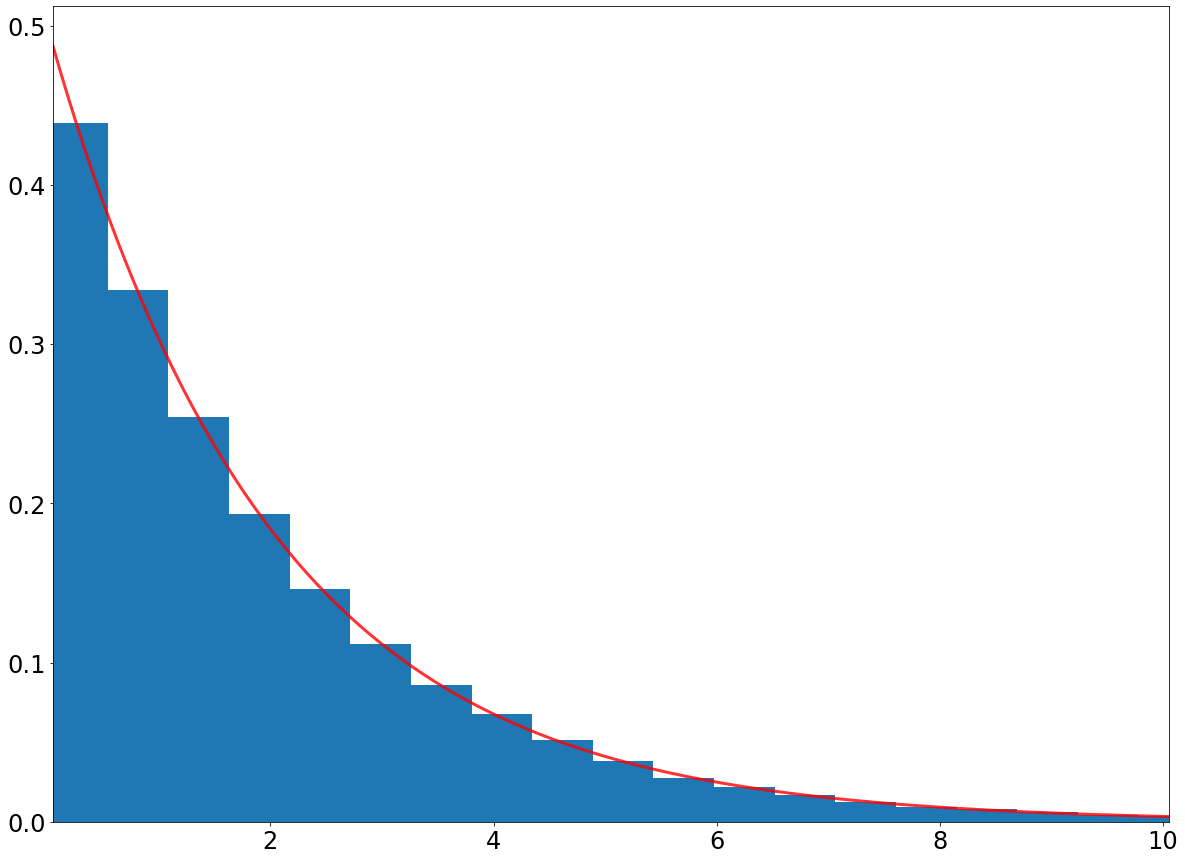

In [118]:
#resize plot
plt.rcParams["figure.figsize"] = (20,15)
fig, ax = plt.subplots(1,1)
plt.tick_params(labelsize = 24)

d = stats.expon.rvs(loc = 0., scale = 2, size = 100000)
ax.hist(d, 50, density=True)

x = np.linspace(0.05, 10.05, 2000)
plt.xlim([0.05, 10.05])
ax.plot(x, stats.expon.pdf(x, loc=0, scale=2), 'r-', lw=3, alpha=0.8, label='expon pdf')

plt.show()

Suppose we have a radioactive sample (plotted and standardized) that has a measured burst of gamma rays after 4 years (located at x = 4); What is the probability that what we observed at the end of 4 years was produced the background rather than a signal?

In the form of integrals, this question becomes:\
$$P = \int_4^\infty f(x) \,dx= F(\infty) - F(4) = 1 - F(4)$$

where $f(x)$ is the exponential pdf and $F(x)$ is the exponential cdf, and $x$ is the time in years since the start of the experiment.

In [143]:
probability = 1 - stats.expon.cdf(4, loc=0, scale=2)
probability

0.1353352832366127

Now we compare the probability that the background produced the 'signal' to the probability starting from the right side of the normal distribution to find our certainty in terms of $\sigma$

In [144]:
stats.norm.ppf(1 - probability, loc=0, scale=1)

1.1015196284987503

There is $1.1\sigma$ certainty that the measurement we observed at 4 years was actually a signal and not signal-like noise from the background.

As the anomalous measurement takes place further and further from the start of the experiment, the sigma value becomes greater and greater; if there were a sudden burst of gamma rays at the end of 20 years, the certainty would be nearly $4\sigma$ that there was *actually* an anomaly to be studied rather than simply background noise producing the measurement.

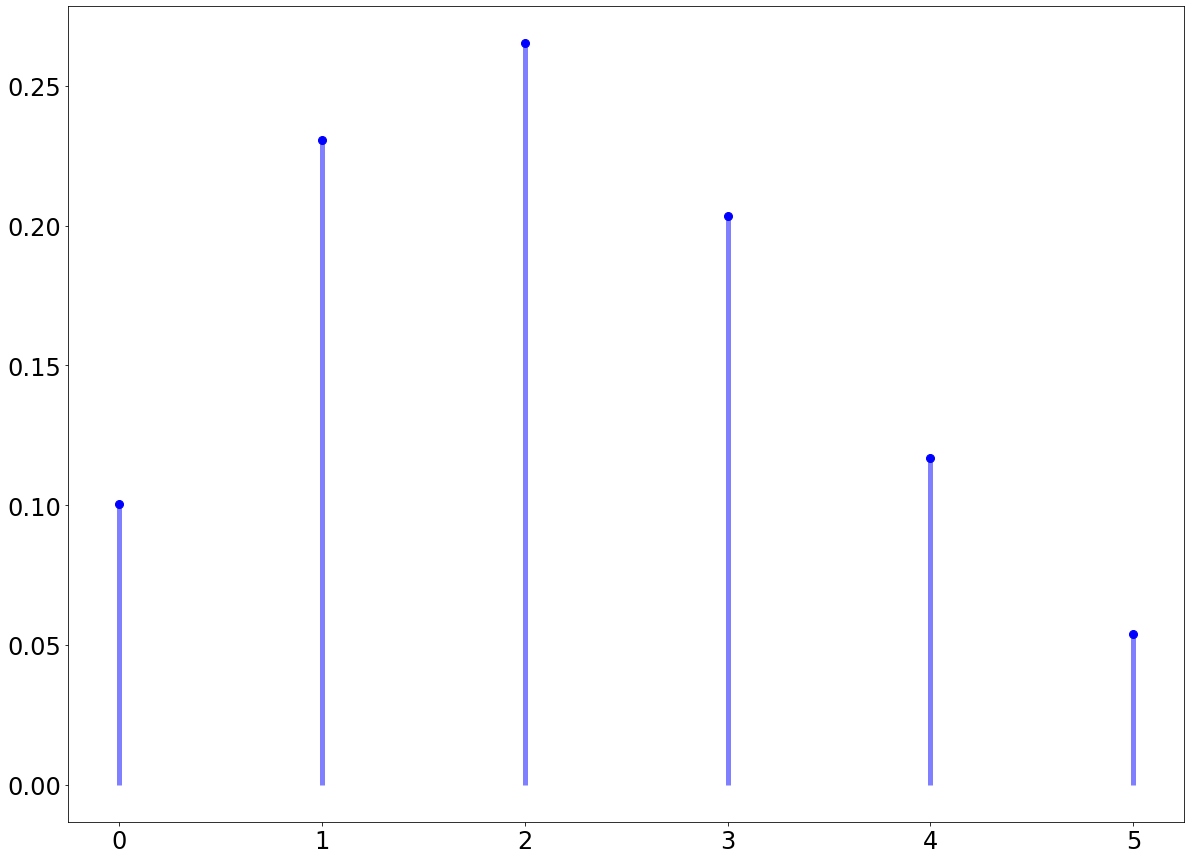

In [181]:
fig, ax = plt.subplots(1,1)
plt.tick_params(labelsize = 24)
mu = 2.3
x = np.arange(stats.poisson.ppf(0.01, mu), 
              stats.poisson.ppf(0.99, mu))
ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.show()

The poisson distribution is used to calculate the probability of discrete events occuring in a fixed interval of time, and the events are independant of eachother but occur with a constant rate. The parameter mu is the average number of events per interval.

Suppose the above graph represents the quantity of junk mail you recieve weekly, and one week you have 4 pieces of mail. What is the probability that someone sent you a piece of mail, rather than it all being junk mail (part of the background distribution)?

In [193]:
probability = 1 - stats.poisson.cdf(5, mu)
print("Probability it came from background : ", probability)
print("Sigma certainty : ", stats.norm.ppf(1 - probability))
print("Probability of getting 4 letters : ", stats.poisson.pmf(5, mu))

Probability it came from background :  0.029975693697454786
Sigma certainty :  1.8811509534583222
Probability of getting 4 letters :  0.053775025581946814


***NOTE TO ASK TA*** Calculating sigma certainty from one side of the normal distribution, or as a double sided distribution? Does 1 sigma relate to 0.68 like the 68-95-99 rule or is it 0.34.

The question asking what is the probability of getting 2.5 pieces of mail is a bad question, and demonstrates why probabilities (and therefore sigmas) of a poisson distribution are discrete (hence *pmf* instead of *pdf*). However, having an *average* of 2.5 pieces of mail is possible when averaging over multiple events; you will never recieve exactly 2.5 pieces of mail though.

